<a href="https://colab.research.google.com/github/sazzad15-1779/machine-learning/blob/master/titanic_datasets_for_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## inserting data


In [20]:
data1  = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
data1.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [21]:
len(data1.index)

891

# analysis of data

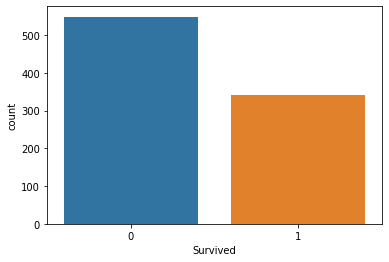

In [22]:
sns.countplot(x='Survived',data = data1)

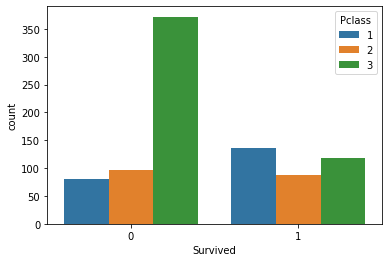

In [23]:
sns.countplot(x ='Survived',hue='Pclass',data= data1)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <a list of 20 Patch objects>)

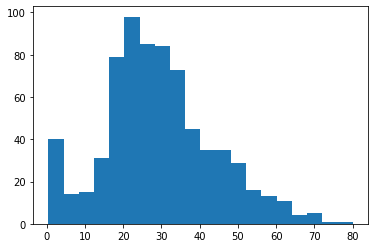

In [24]:
plt.hist(data1['Age'],bins=20)

### data wrangling

In [25]:
data1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
data1.dropna(inplace=True) # deleting all null values
data1.isnull().sum() # check

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### finding alternative values by dummies 

In [10]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
sex
embarked = pd.get_dummies(data['Embarked'],drop_first=True)
embarked

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1
...,...,...
871,0,1
872,0,1
879,0,0
887,0,1


In [33]:
data1 = pd.concat([data1,sex,embarked],axis=1)
data1.head(2)

,Survived,Age,SibSp,Parch,Fare,Embarked,male,Q,S,male,Q,S,male,Q,S
1,1,38.0,1,0,71.2833,C,0,0,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,S,0,0,1,0,0,1,0,0,1


# spliting data

In [51]:
data1.drop('Embarked',axis =1 ,inplace=True)
data1.head(2)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S,male,Q,S
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,1,0,0,1,0,0,1


In [52]:
x = data1.drop('Survived',axis=1)
y = data1[['Survived']]
x.ndim

2

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = .25,random_state =1)

# fit logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [56]:
lreg = LogisticRegression()
lreg.fit(train_x,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
predict  = lreg.predict(test_x)
predict

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0])

## Accuracy check

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y,predict)

array([[ 8,  7],
       [ 6, 25]])

In [62]:
lreg.score(test_x,test_y)

0.717391304347826

In [0]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy_score(test_y,predict)

0.717391304347826

In [0]:
from sklearn.metrics import classification_report

In [68]:
classification_report(test_y,predict)

'              precision    recall  f1-score   support\n\n           0       0.57      0.53      0.55        15\n           1       0.78      0.81      0.79        31\n\n    accuracy                           0.72        46\n   macro avg       0.68      0.67      0.67        46\nweighted avg       0.71      0.72      0.71        46\n'

In [0]:
from sklearn.metrics import precision_recall_curve
preci,recal,thre  = precision_recall_curve(test_y,predict)

In [70]:
preci

array([0.67391304, 0.78125   , 1.        ])

In [71]:
recal

array([1.        , 0.80645161, 0.        ])

In [73]:
thre

array([0, 1])